<a href="https://colab.research.google.com/github/EJamdar05/cs276-project/blob/main/CS276_Project_Ukraine_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('output.csv')
df.head()

tweet_id lang   country  verified  sentiment_neutral  \
0  1540451336876986373   cs  Slovakia      True             0.5044   
1  1516696238212661253   ro     Italy     False             0.9146   
2  1587766197298548738   te     India      True             0.5799   
3  1586193152175529984   te     India      True             0.0000   
4  1580452730212331520   te     India      True             0.0000   

   entail_prob  contra_prob       stance  
0         0.30         0.70       unsure  
1         0.18         0.82       unsure  
2         0.31         0.69       unsure  
3         0.03         0.97       unsure  
4         0.33         0.67  pro-Ukraine

In [4]:
B = nx.Graph()

stances = df["stance"].unique()
countries = df["country"].unique()

print(stances)
print(countries)

['unsure' 'pro-Ukraine' 'pro-Russia']
['Slovakia' 'Italy' 'India' 'Czech Republic' 'France' 'Ukraine' 'Nepal'
 'Japan' 'United States of America' 'Azerbaijan' 'South Africa'
 'South Korea' 'Latvia' 'Saudi Arabia' 'United Arab Emirates' 'Turkey'
 'Qatar' 'Israel' 'Egypt' 'Lebanon' 'State of Palestine'
 "People's Republic of China" 'Germany' 'Algeria' 'Morocco' 'Tunisia'
 'Iraq' 'United Kingdom' 'Syria' 'Iran' 'Libya' 'Bahrain' 'Kuwait'
 'Australia' 'Nigeria' 'Singapore' 'Pakistan' 'Canada' 'Malaysia'
 'Philippines' 'Afghanistan' 'Argentina' 'Portugal' 'Brazil' 'Chile'
 'Mexico' 'Spain' 'Bulgaria' 'Slovenia' 'Finland' 'Thailand' 'Denmark'
 'Norway' 'Tuvalu' 'Sweden' 'Lithuania' 'Romania' 'Bangladesh' 'Greece'
 'Cyprus' 'Turkish Republic of Northern Cyprus' 'Russia' 'Kazakhstan'
 'Belarus' 'Poland' 'Soviet Union' 'Hungary' 'Switzerland' 'Austria'
 'Luxembourg' 'Republic of Ireland' 'German Democratic Republic'
 'Netherlands' 'Belgium' 'Senegal' 'Wales' 'Indonesia' 'Haiti' 'Monaco'
 'Europ

In [5]:
B.add_nodes_from(stances, bipartite='stance')
B.add_nodes_from(countries, bipartite='country')

for index, row in df.iterrows():
    B.add_edge(row['stance'], row['country'], tweet_id=row['tweet_id'], entail_prob=row["entail_prob"], contra_prob=row["contra_prob"])

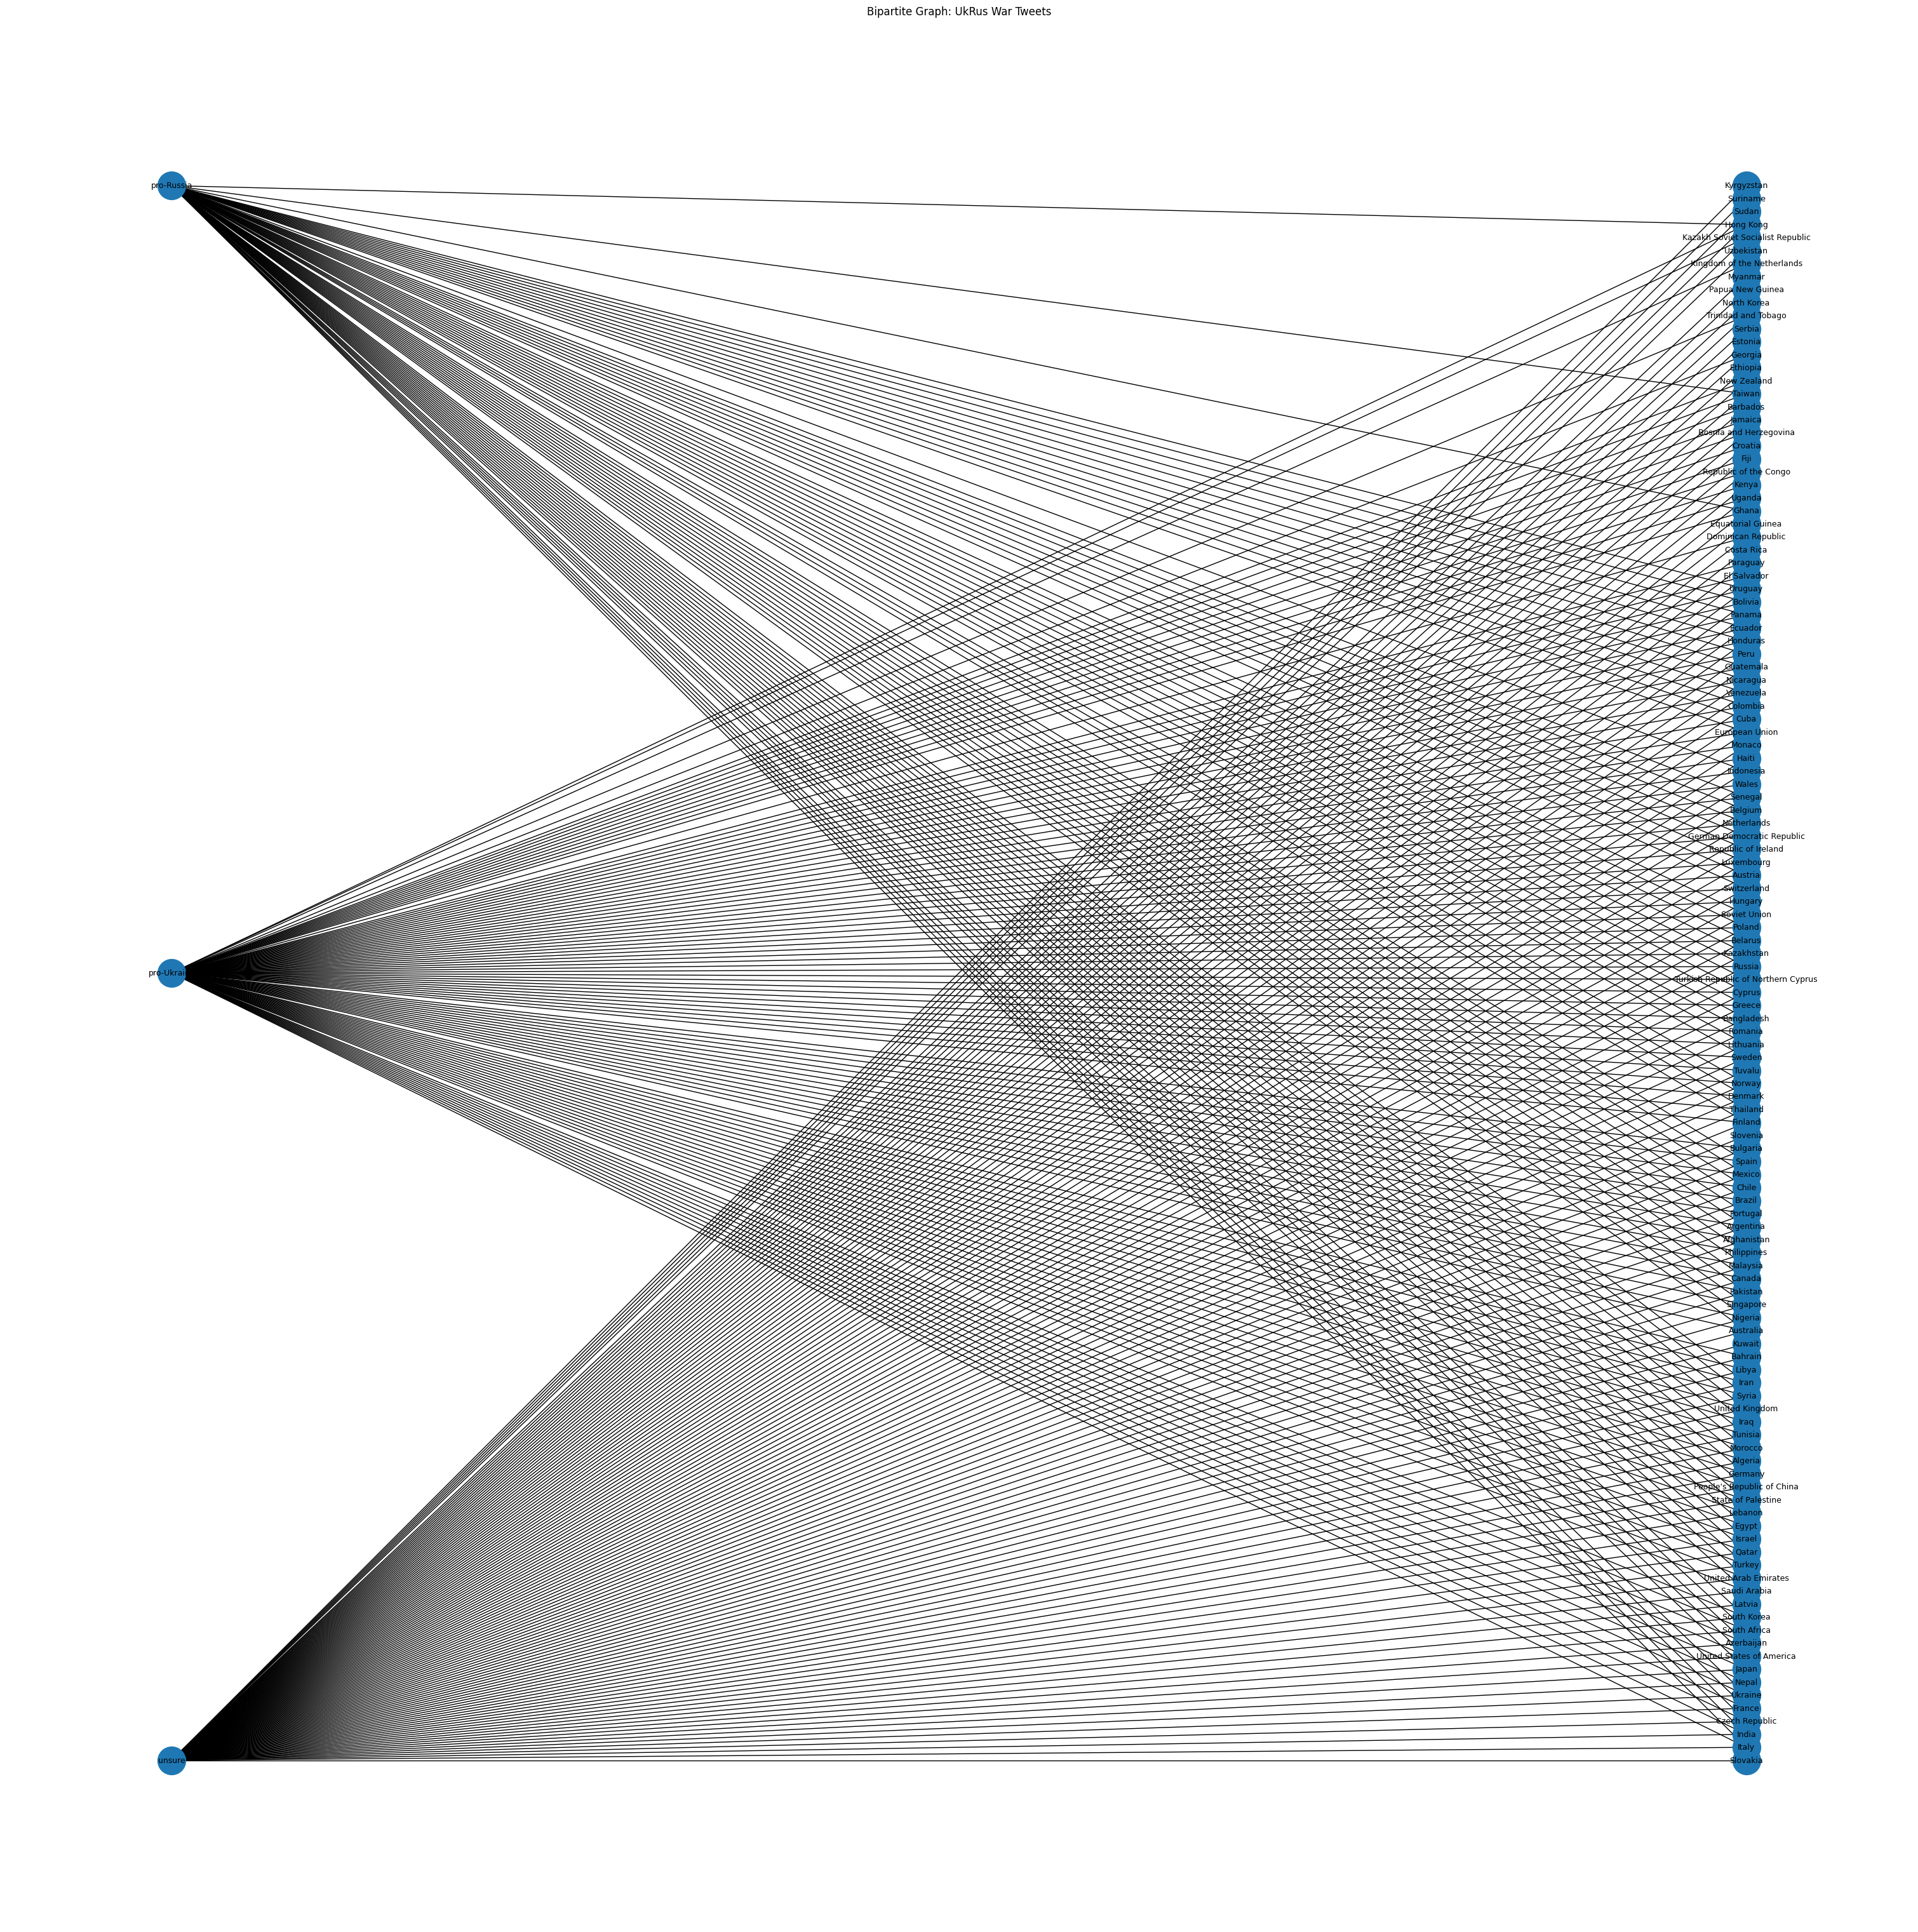

In [9]:
stances_nodes = {}
for node, attr in B.nodes(data=True):
    if attr['bipartite'] == 'stance':
        stances_nodes[node] = attr
pos = nx.bipartite_layout(B, stances_nodes)

plt.figure(figsize=(30, 30))
nx.draw(B, pos, with_labels=True, node_size = 1000, font_size = 9)
plt.title("Bipartite Graph: UkRus War Tweets")
plt.show()

In [10]:
nx.write_edgelist(B, "bipartite_stances_per_country.edgelist")